# Importing necessary packages

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Loading data set

In [8]:
df_fi = pd.read_csv(r"C:\Users\User\BankCurupt\Bank_dcf.csv",sep = ',')

In [9]:
df_fi.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr8,Attr9,Attr12,Attr13,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.834118,0.031094,0.978440,0.017617,0.741344,0.875099,0.011637,0.013458,0.455331,0.353164,...,0.995314,0.756469,0.009528,0.088799,0.003655,0.013877,0.016297,0.012654,0.277543,0
1,0.830318,0.035191,0.978221,0.016544,0.741265,0.873559,0.011069,0.011092,0.455096,0.353159,...,0.995311,0.755852,0.009532,0.088799,0.002015,0.009195,0.017675,0.008230,0.277490,0
2,0.835345,0.024954,0.980172,0.025679,0.741636,0.873560,0.014547,0.015327,0.455589,0.353166,...,0.995322,0.756308,0.009482,0.088799,0.002602,0.010925,0.015979,0.015947,0.278090,0
3,0.834666,0.037560,0.977635,0.014879,0.741095,0.873560,0.010558,0.014099,0.455333,0.353170,...,0.995352,0.756829,0.009456,0.088912,0.002859,0.013745,0.016553,0.011177,0.277513,0
4,0.831538,0.028123,0.978924,0.019947,0.741467,0.874206,0.012643,0.013307,0.455200,0.353152,...,0.995307,0.755990,0.009555,0.088799,0.002985,0.012217,0.016158,0.013799,0.277552,0


In [10]:
df_fi.shape

(10083, 54)

# Assigning data features to X ,and Target class to y

In [11]:

x = df_fi.iloc[:,0:53]

x.head()

y = df_fi.iloc[:,53]

y.value_counts()


0    9685
1     398
Name: class, dtype: int64

In [14]:
x.shape

(10083, 53)

# SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

In [15]:
sm = SMOTE(random_state=2,sampling_strategy=0.5)
x_smt,y_smt = sm.fit_sample(x,y.ravel())

In [21]:
print("After OverSampling, counts of label '1': {} ".format(y_smt[y_smt==1].shape[0]))
print("After OverSampling, counts of label '0': {}".format(y_smt[y_smt==0].shape[0]))

After OverSampling, counts of label '1': 4842 
After OverSampling, counts of label '0': 9685


# Train Test split

In [16]:

x_train,x_test,y_train,y_test=train_test_split(x_smt,y_smt,test_size=0.3,random_state = 42)


In [17]:
x_train.shape

(10168, 53)

In [18]:
x_test.shape

(4359, 53)

In [22]:
print("After spliting, counts of label '1' in TRAIN data: {} ".format(y_train[y_train==1].shape[0]))
print("After spliting, counts of label '0' in TRAIN data: {}".format(y_train[y_train==0].shape[0]))

After spliting, counts of label '1' in TRAIN data: 3405 
After spliting, counts of label '0' in TRAIN data: 6763


In [23]:
print("After spliting, counts of label '1' in test data: {} ".format(y_test[y_test==1].shape[0]))
print("After spliting, counts of label '0' in test data: {}".format(y_test[y_test==0].shape[0]))

After spliting, counts of label '1' in TRAIN data: 1437 
After spliting, counts of label '0' in TRAIN data: 2922


# support Vector machine

In [24]:
from sklearn import svm

In [25]:
model_svm = svm.SVC(verbose=True,probability=True,gamma='scale',kernel='linear')

In [26]:
model_svm.fit(x_train,y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [27]:
y_predicted = model_svm.predict(x_test)

# Confusion matrix and classification report

In [28]:

print(classification_report(y_test, y_predicted))

cm=confusion_matrix(y_test, y_predicted)
print(cm)
print(accuracy_score(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80      2922
           1       0.00      0.00      0.00      1437

   micro avg       0.67      0.67      0.67      4359
   macro avg       0.34      0.50      0.40      4359
weighted avg       0.45      0.67      0.54      4359

[[2922    0]
 [1437    0]]
0.6703372333103923


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
y_pred=pd.Series(y_predicted)
y_test = pd.Series(y_test)

# printing the size of predicted data set and test data

In [30]:
print("label\tcount")
print(y_pred.value_counts())

label	count
0    4359
dtype: int64


In [33]:
print("label\tcount")
print(y_test.value_counts())

label	count
0    2922
1    1437
dtype: int64


# AUC ROC curve

In [36]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_svm.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


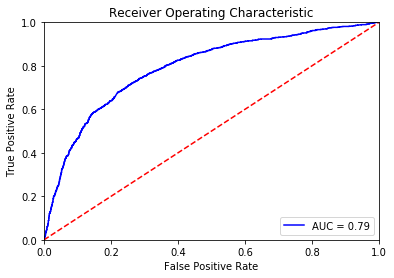

In [37]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [38]:
print("roc score = ",roc_auc)

roc score =  0.7917900914379291


In [39]:
gini = (2*roc_auc)-1

In [40]:
print("Gini score = ",gini)

Gini score =  0.5835801828758582


In [41]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_predicted)

0.0

In [43]:
confi_lvl = model_svm.predict_proba(x)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9163953C8>,
      dtype=object)

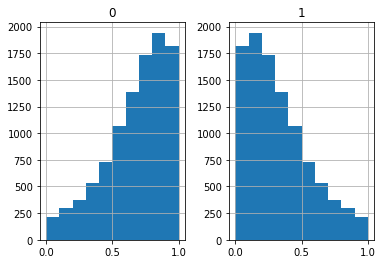

In [44]:
confi_lvl = pd.DataFrame(confi_lvl)
confi_lvl.hist()

In [45]:
feature_importance = abs(model_svm.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

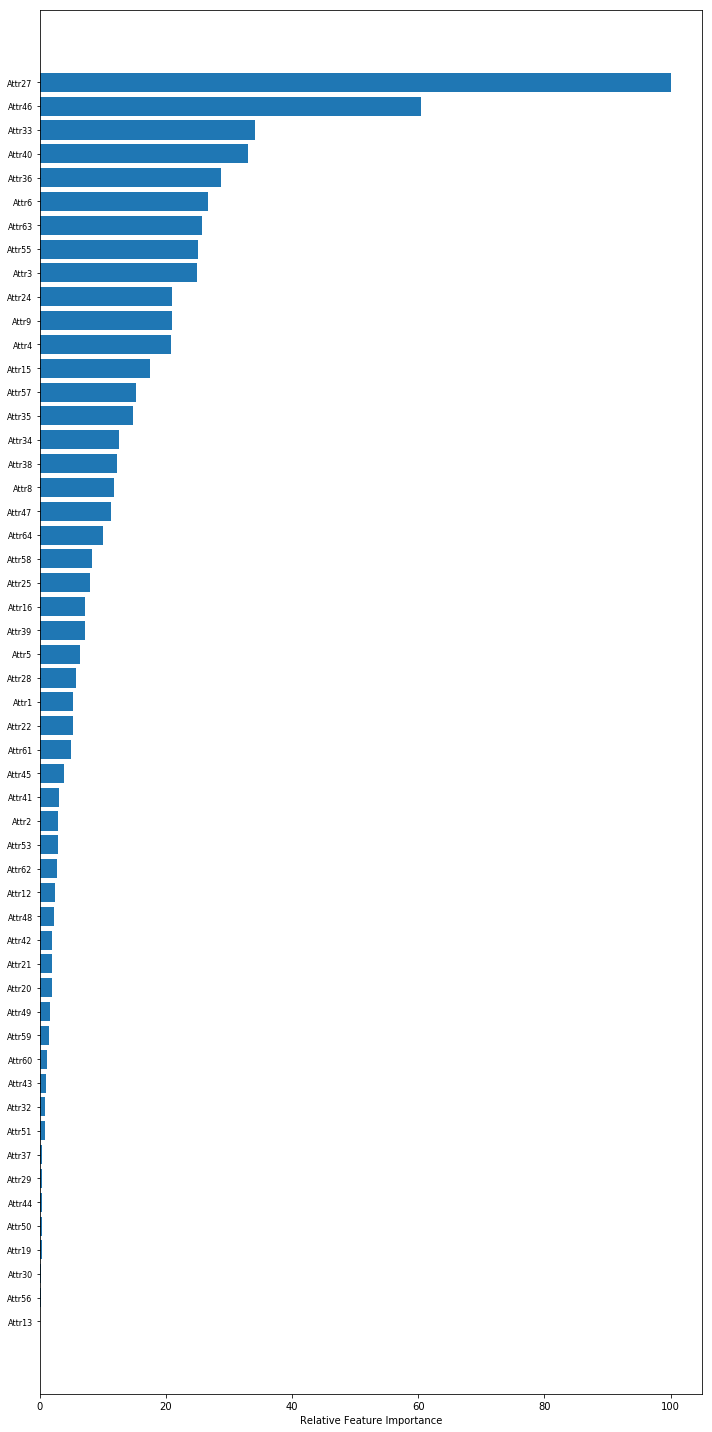

In [46]:
featfig = plt.figure(figsize=(10,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()